# Mount drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# No rust

#### Read image

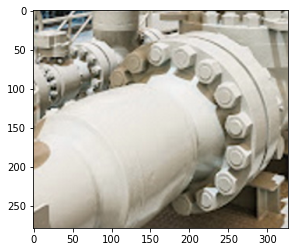

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

path = '/content/gdrive/MyDrive/<path>'
rust = cv2.imread(path+'/no_rust.jpg')
plt.imshow(rust)
plt.show()

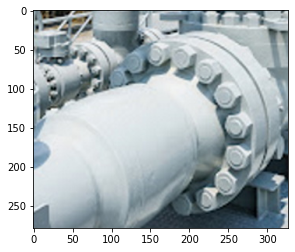

In [3]:
rust = cv2.cvtColor(rust, cv2.COLOR_BGR2RGB)
plt.imshow(rust)
plt.show()

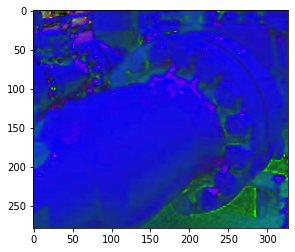

In [4]:
hsv_rust = cv2.cvtColor(rust, cv2.COLOR_BGR2HSV)
plt.imshow(hsv_rust)
plt.show()

#### Create mask

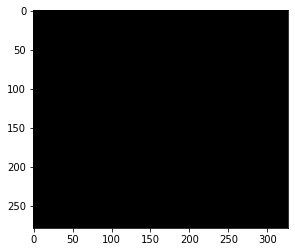

In [5]:
# any pixel that falls within the range will return 1 else 0 (concept of thresholding)
lower_bound = np.array([120, 80, 0],dtype="uint8")
upper_bound = np.array([255, 255, 80],dtype="uint8")
mask = cv2.inRange(hsv_rust, lower_bound, upper_bound)

final_mask = cv2.bitwise_and(rust,rust,mask=mask)
plt.imshow(final_mask)

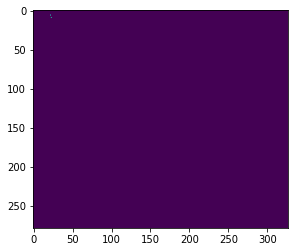

In [9]:
# use morphological processing to close gaps between nearby components
close = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20,20)))
plt.imshow(close)
plt.show()

#### Find contours

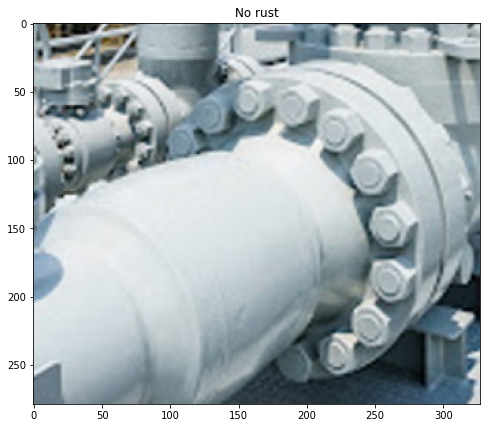

In [10]:
contours, hierarchy = cv2.findContours(close,
  cv2.RETR_LIST,
  cv2.CHAIN_APPROX_SIMPLE)

message = 'No rust'

for c in contours:
    area = cv2.contourArea(c)

    # ignore all small contours 
    if area < 500:
        cv2.fillPoly(close, pts=[c], color=0)
        continue

    message = 'Alert: Rust detected'
    rect = cv2.minAreaRect(c)
    box = cv2.boxPoints(rect)

    # convert all coordinates floating point values to int
    box = np.int0(box)
    cv2.drawContours(rust, [box], 0, (255, 0, 0),2)

plt.figure(figsize=(8,8))
plt.title(message)
plt.imshow(rust)
plt.show()

# Rust

#### Read image

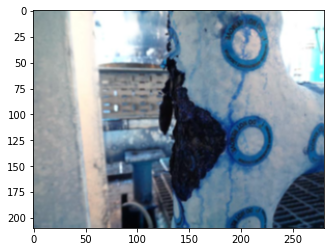

In [21]:
path = '/content/gdrive/MyDrive/<path>'
rust = cv2.imread(path+'/rust.png')
plt.imshow(rust)
plt.show()

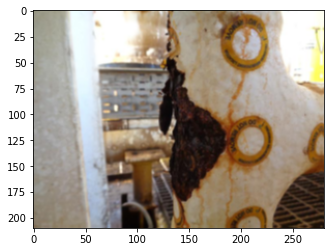

In [22]:
rust = cv2.cvtColor(rust, cv2.COLOR_BGR2RGB)
plt.imshow(rust)
plt.show()

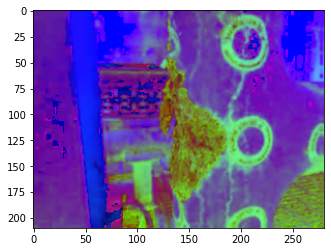

In [23]:
hsv_rust = cv2.cvtColor(rust, cv2.COLOR_BGR2HSV)
plt.imshow(hsv_rust)
plt.show()

#### Create mask

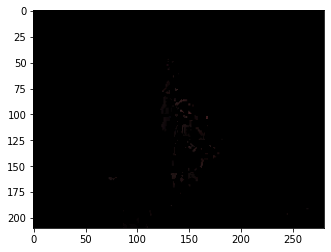

In [24]:
# any pixel that falls within the range will return 1 else 0 (concept of thresholding)
lower_bound = np.array([120, 80, 0],dtype="uint8")
upper_bound = np.array([255, 255, 80],dtype="uint8")
mask = cv2.inRange(hsv_rust, lower_bound, upper_bound)

final_mask = cv2.bitwise_and(rust,rust,mask=mask)
plt.imshow(final_mask)

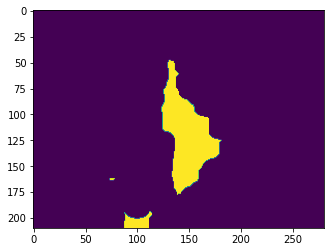

In [25]:
# use morphological processing to close gaps between nearby components
close = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20,20)))
plt.imshow(close)
plt.show()

#### Find contours

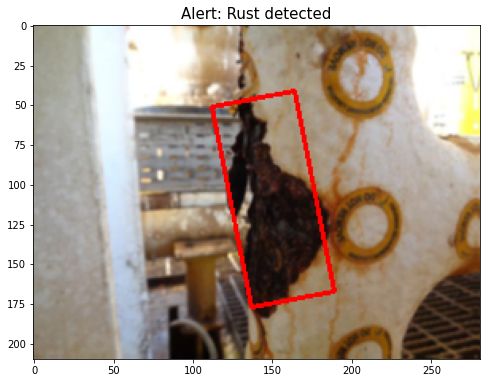

In [26]:
contours, hierarchy = cv2.findContours(close,
  cv2.RETR_LIST,
  cv2.CHAIN_APPROX_SIMPLE)

message = 'No rust'

for c in contours:
    area = cv2.contourArea(c)

    # ignore all small contours 
    if area < 500:
        cv2.fillPoly(close, pts=[c], color=0)
        continue

    message = 'Alert: Rust detected'
    rect = cv2.minAreaRect(c)
    box = cv2.boxPoints(rect)

    # convert all coordinates floating point values to int
    box = np.int0(box)
    cv2.drawContours(rust, [box], 0, (255, 0, 0),2)

plt.figure(figsize=(8,8))
plt.title(message, fontsize=15)
plt.imshow(rust)
plt.show()

# Sum-up

In [105]:
inputs = [] # store input images
rusts = [] # store modified images
path = '/content/gdrive/MyDrive/<path>'

for i in range(1,4):
  img = cv2.imread(path + '/rust_' + str(i) + ".png")
  rust = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  inputs.append(img)
  rusts.append(rust)

In [106]:
final_masks = []
close_ops = []
messages = []

In [107]:
def segment_rust(image):
    hsv_rust = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv_rust, np.array([120, 80, 0],dtype="uint8"), np.array([255, 255, 80],dtype="uint8"))
    final_masks.append(cv2.bitwise_and(image,image, mask=mask))

    close = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20,20)))
    close_ops.append(close)

    def find_contours(mask):
      contours, hierarchy = cv2.findContours(mask,
                            cv2.RETR_LIST,
                            cv2.CHAIN_APPROX_SIMPLE)

      message = 'No rust' # assume no rust initially

      for c in contours:
        area = cv2.contourArea(c)

        # ignore all small contours 
        if area < 500:
            cv2.fillPoly(mask, pts=[c], color=0)
            continue

        message = 'Alert: Rust detected' 
        rect = cv2.minAreaRect(c)
        box = cv2.boxPoints(rect)

        # convert all coordinates floating point values to int
        box = np.int0(box)
        cv2.drawContours(image, [box], 0, (255, 0, 0),2)
      
      return message

    messages.append(find_contours(close))


In [108]:
for x in rusts:
    segment_rust(x)

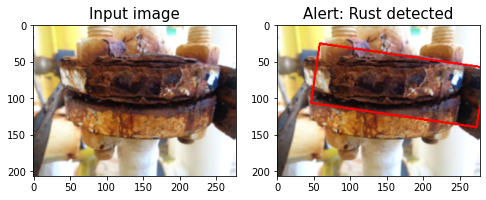

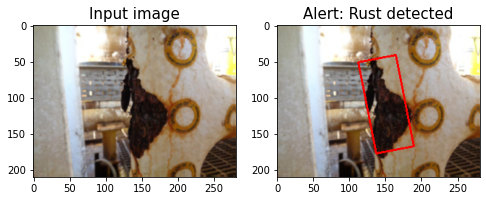

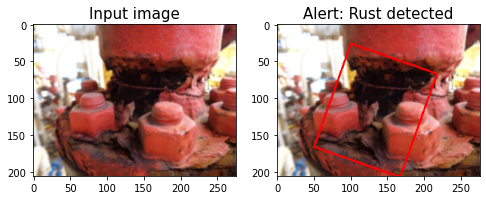

In [109]:
for i in range(0, 3):
    plt.figure(figsize=(8,8))
    plt.subplot(1, 2, 1)
    plt.title('Input image', fontsize=15)
    plt.imshow(cv2.cvtColor(inputs[i], cv2.COLOR_BGR2RGB))
    plt.subplot(1, 2, 2)
    plt.title(messages[i], fontsize=15)
    plt.imshow(rusts[i])
    # plt.savefig('./rusts_'+ str(i) +'.png', bbox_inches='tight',pad_inches = 0)
    plt.show()

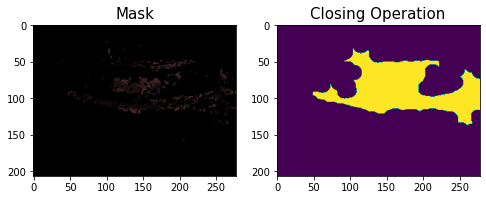

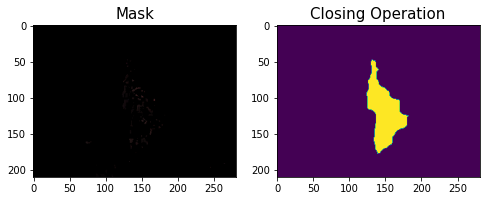

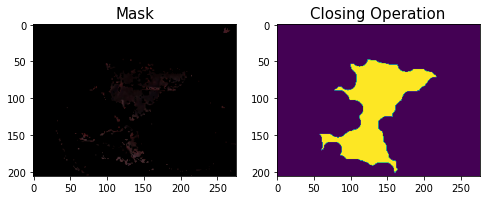

In [110]:
# visualize the process
for i in range(0, 3):
    plt.figure(figsize=(8,8))
    plt.subplot(1, 2, 1)
    plt.title('Mask', fontsize=15)
    plt.imshow(final_masks[i])
    plt.subplot(1, 2, 2)
    plt.title('Closing Operation', fontsize=15)
    plt.imshow(close_ops[i])
    plt.show()